In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
calls = pd.read_csv('callsf0d4f5a.csv')
customers = pd.read_csv('customers2afd6ea.csv')
reason = pd.read_csv('reason18315ff.csv')
test = pd.read_csv('testbc7185d.csv')
sentiment = pd.read_csv('sentiment_statisticscc1e57a.csv')

In [4]:
print(len(calls))
# print(len(customers))
# print(len(reason))
# print(len(test))
print(len(sentiment))

71810
71810


In [5]:
reason.head()

,call_id,primary_call_reason
0,4667960400,Voluntary Cancel
1,1122072124,Booking
2,6834291559,IRROPS
3,2266439882,Upgrade
4,1211603231,Seating


In [6]:
calls.head()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript
0,4667960400,2033123310,963118,7/31/2024 23:56,8/1/2024 0:03,8/1/2024 0:34,\n\nAgent: Thank you for calling United Airlin...
1,1122072124,8186702651,519057,8/1/2024 0:03,8/1/2024 0:06,8/1/2024 0:18,\n\nAgent: Thank you for calling United Airlin...
2,6834291559,2416856629,158319,7/31/2024 23:59,8/1/2024 0:07,8/1/2024 0:26,\n\nAgent: Thank you for calling United Airlin...
3,2266439882,1154544516,488324,8/1/2024 0:05,8/1/2024 0:10,8/1/2024 0:17,\n\nAgent: Thank you for calling United Airlin...
4,1211603231,5214456437,721730,8/1/2024 0:04,8/1/2024 0:14,8/1/2024 0:23,\n\nAgent: Thank you for calling United Airlin...


In [7]:
calls.agent_id.value_counts().sum()

np.int64(71810)

In [8]:
sentiment.head()

,call_id,agent_id,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,4667960400,963118,neutral,angry,-0.04,0.39
1,1122072124,519057,calm,neutral,0.02,0.35
2,6834291559,158319,neutral,polite,-0.13,0.32
3,2266439882,488324,neutral,frustrated,-0.20,0.20
4,1211603231,721730,neutral,polite,-0.05,0.35


In [10]:
calls['call_start_datetime'] = pd.to_datetime(calls['call_start_datetime'])
calls['agent_assigned_datetime'] = pd.to_datetime(calls['agent_assigned_datetime'])
calls['call_end_datetime'] = pd.to_datetime(calls['call_end_datetime'])

In [11]:
calls['waiting_time(in min)'] = (calls['agent_assigned_datetime'] - calls['call_start_datetime']).dt.total_seconds() / 60
calls['handle_time(in min)'] = (calls['call_end_datetime'] - calls['agent_assigned_datetime']).dt.total_seconds() / 60

In [12]:
merged_data = pd.merge(sentiment, calls, on='call_id', how='inner')

In [55]:
AHT = merged_data['handle_time(in min)'].mean()

In [15]:
merged_data.drop(columns=['call_start_datetime','agent_assigned_datetime','call_end_datetime','call_transcript'],inplace=True)

In [16]:
for match in (merged_data['agent_id_x'] == merged_data['agent_id_y']):
    if(match == False):
        print("yes")

In [17]:
for num in merged_data.customer_id.value_counts():
    if num> 1:
        print("yes")

In [18]:
merged_data.drop(columns=['agent_id_y'],inplace=True)

In [19]:
merged_data.head()

,call_id,agent_id_x,agent_tone,customer_tone,average_sentiment,silence_percent_average,customer_id,waiting_time(in min),handle_time(in min)
0,4667960400,963118,neutral,angry,-0.04,0.39,2033123310,7.0,31.0
1,1122072124,519057,calm,neutral,0.02,0.35,8186702651,3.0,12.0
2,6834291559,158319,neutral,polite,-0.13,0.32,2416856629,8.0,19.0
3,2266439882,488324,neutral,frustrated,-0.20,0.20,1154544516,5.0,7.0
4,1211603231,721730,neutral,polite,-0.05,0.35,5214456437,10.0,9.0


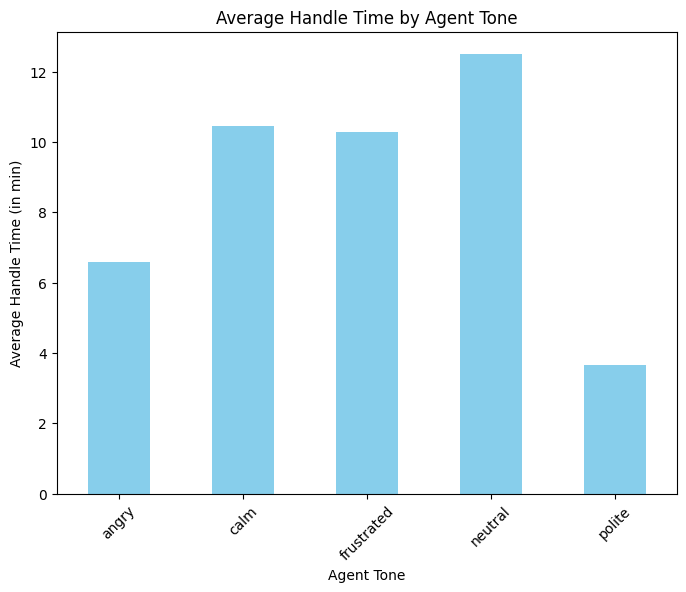

In [20]:
plt.figure(figsize=(8, 6))
merged_data.groupby('agent_tone')['handle_time(in min)'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Handle Time by Agent Tone')
plt.xlabel('Agent Tone')
plt.ylabel('Average Handle Time (in min)')
plt.xticks(rotation=45)
plt.show()  

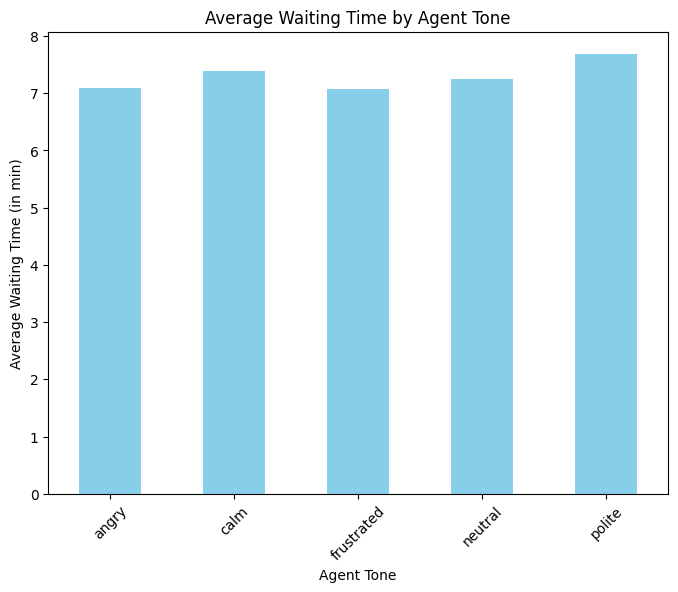

In [29]:
plt.figure(figsize=(8, 6))
merged_data.groupby('agent_tone')['waiting_time(in min)'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Waiting Time by Agent Tone')
plt.xlabel('Agent Tone')
plt.ylabel('Average Waiting Time (in min)')
plt.xticks(rotation=45)
plt.show()

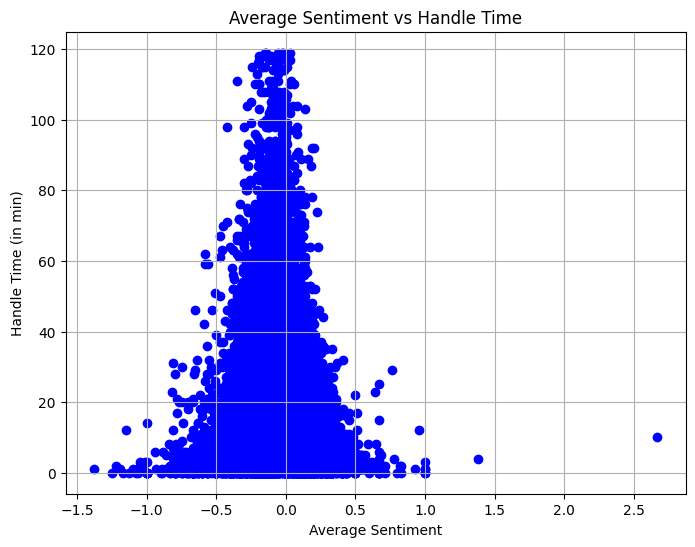

In [30]:
plt.figure(figsize=(8, 6))
plt.scatter(merged_data['average_sentiment'], merged_data['handle_time(in min)'], color='blue')
plt.title('Average Sentiment vs Handle Time')
plt.xlabel('Average Sentiment')
plt.ylabel('Handle Time (in min)')
plt.grid(True)
plt.show()

In [47]:
merged_data.groupby('customer_tone').count()

,call_id,agent_id_x,agent_tone,average_sentiment,silence_percent_average,customer_id,waiting_time(in min),handle_time(in min)
customer_tone,,,,,,,,
angry,14408,14408,14367,14388,14408,14408,14408,14408
calm,14347,14347,14302,14322,14347,14347,14347,14347
frustrated,14240,14240,14199,14222,14240,14240,14240,14240
neutral,14444,14444,14407,14428,14444,14444,14444,14444
polite,14371,14371,14318,14341,14371,14371,14371,14371


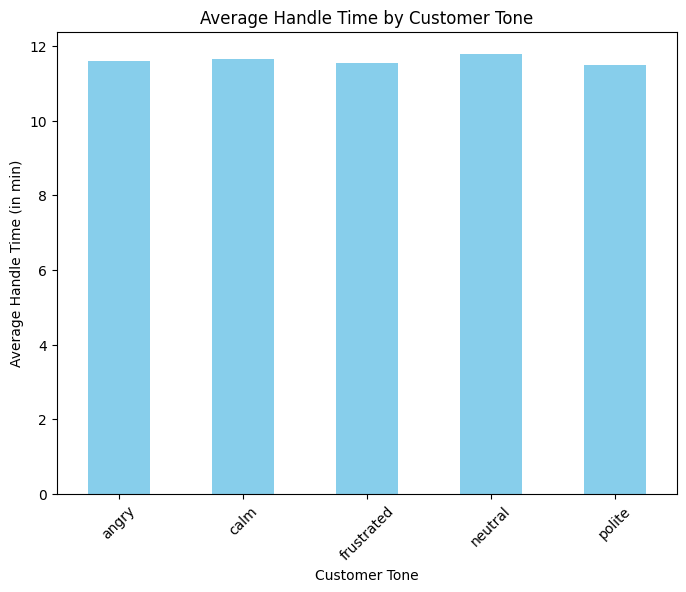

In [34]:
plt.figure(figsize=(8, 6))
merged_data.groupby('customer_tone')['handle_time(in min)'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Handle Time by Customer Tone')
plt.xlabel('Customer Tone')
plt.ylabel('Average Handle Time (in min)')
plt.xticks(rotation=45)
plt.show()

### insight : 
1. handle time is almost same for each customer tone 
2. average handle time is more for agents who are having neutral tone
3. AHT is comparitively less for polite agent compared to others

In [48]:
reason_merged = pd.merge(merged_data,reason,on='call_id',how='inner')

In [51]:
reason_merged.head()

,call_id,agent_id_x,agent_tone,customer_tone,average_sentiment,silence_percent_average,customer_id,waiting_time(in min),handle_time(in min),primary_call_reason
0,4667960400,963118,neutral,angry,-0.04,0.39,2033123310,7.0,31.0,Voluntary Cancel
1,1122072124,519057,calm,neutral,0.02,0.35,8186702651,3.0,12.0,Booking
2,6834291559,158319,neutral,polite,-0.13,0.32,2416856629,8.0,19.0,IRROPS
3,2266439882,488324,neutral,frustrated,-0.20,0.20,1154544516,5.0,7.0,Upgrade
4,1211603231,721730,neutral,polite,-0.05,0.35,5214456437,10.0,9.0,Seating


### primary_reason_call is having some extra spaces , so removing it and cleaning the series

In [56]:
reason_merged['primary_call_reason'] = reason_merged['primary_call_reason'].str.strip()  
reason_merged['primary_call_reason'] = reason_merged['primary_call_reason'].str.replace(r'\s+', ' ', regex=True)  
reason_merged['primary_call_reason'] = reason_merged['primary_call_reason'].str.title()

In [57]:
reason_merged['primary_call_reason'].unique()

array(['Voluntary Cancel', 'Booking', 'Irrops', 'Upgrade', 'Seating',
       'Mileage Plus', 'Checkout', 'Voluntary Change', 'Post Flight',
       'Check In', 'Other Topics', 'Communications', 'Schedule Change',
       'Products & Services', 'Digital Support', 'Disability',
       'Unaccompanied Minor', 'Baggage', 'Traveler Updates', 'Etc',
       'Post-Flight', 'Check-In', 'Products And Services'], dtype=object)

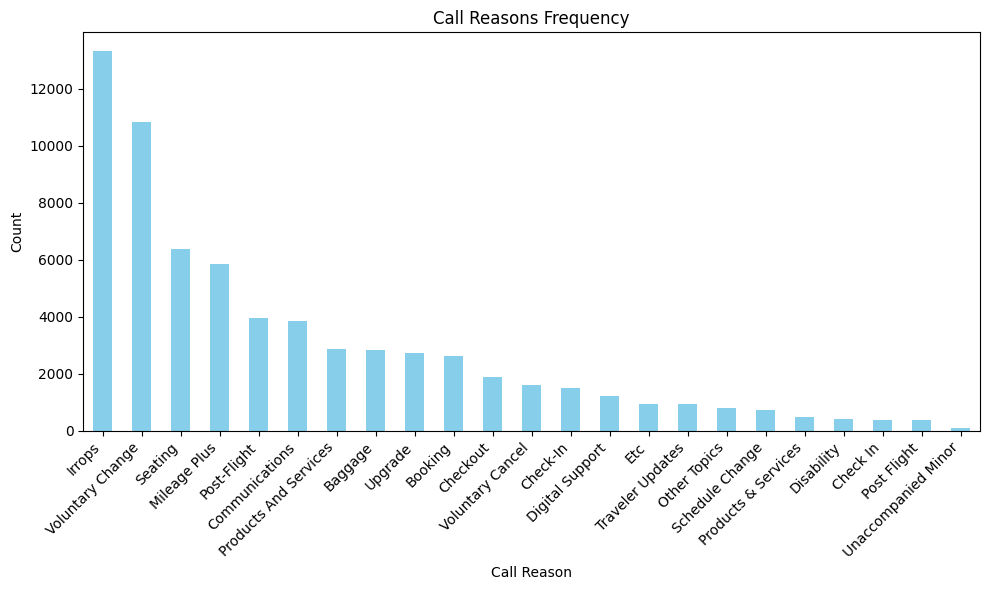

In [64]:
reason_count = reason_merged.primary_call_reason.value_counts()

plt.figure(figsize=(10, 6))
reason_count.plot(kind='bar', color='skyblue')
plt.title('Call Reasons Frequency')
plt.xlabel('Call Reason')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [65]:
most_frequent_reason = reason_count.idxmax()
least_frequent_reason = reason_count.idxmin()

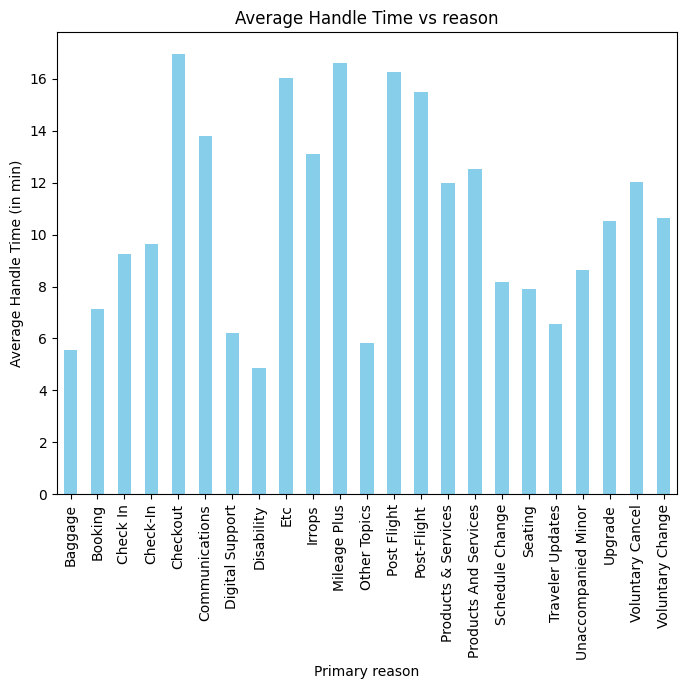

In [67]:
avg_handle_time = reason_merged.groupby('primary_call_reason')['handle_time(in min)'].mean()

plt.figure(figsize=(8, 6))
avg_handle_time.plot(kind='bar', color='skyblue')
plt.title('Average Handle Time vs reason')
plt.xlabel('Primary reason')
plt.ylabel('Average Handle Time (in min)')
plt.xticks(rotation=90)
plt.show()

In [68]:
most_frequent_avg_time = avg_handle_time[most_frequent_reason]
least_frequent_avg_time = avg_handle_time[least_frequent_reason]

In [72]:
percentage_difference = ((most_frequent_avg_time - least_frequent_avg_time) / least_frequent_avg_time) * 100
print(percentage_difference)

51.20753929498577


## insight:
1. most frequent reason - Irrops
2. least frequent reason - Unaccompanied Minor
3. average handle time for Irrops = 13.085267823604537
4. average handle time for Unaccompanied Minor = 8.653846153846153
5. percentage difference between the average handling time for the most frequent and least frequent call reasons = 51.20753929498577